<a href="https://colab.research.google.com/github/adrianblazeusz/Machine-learning/blob/main/MY%20PROJECTS/Used_Mobile_Phone_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
df = pd.read_csv('/content/drive/MyDrive/used_device_data.csv')

In [30]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [32]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [33]:
df=df.dropna()

In [34]:
df.isnull().sum()

device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

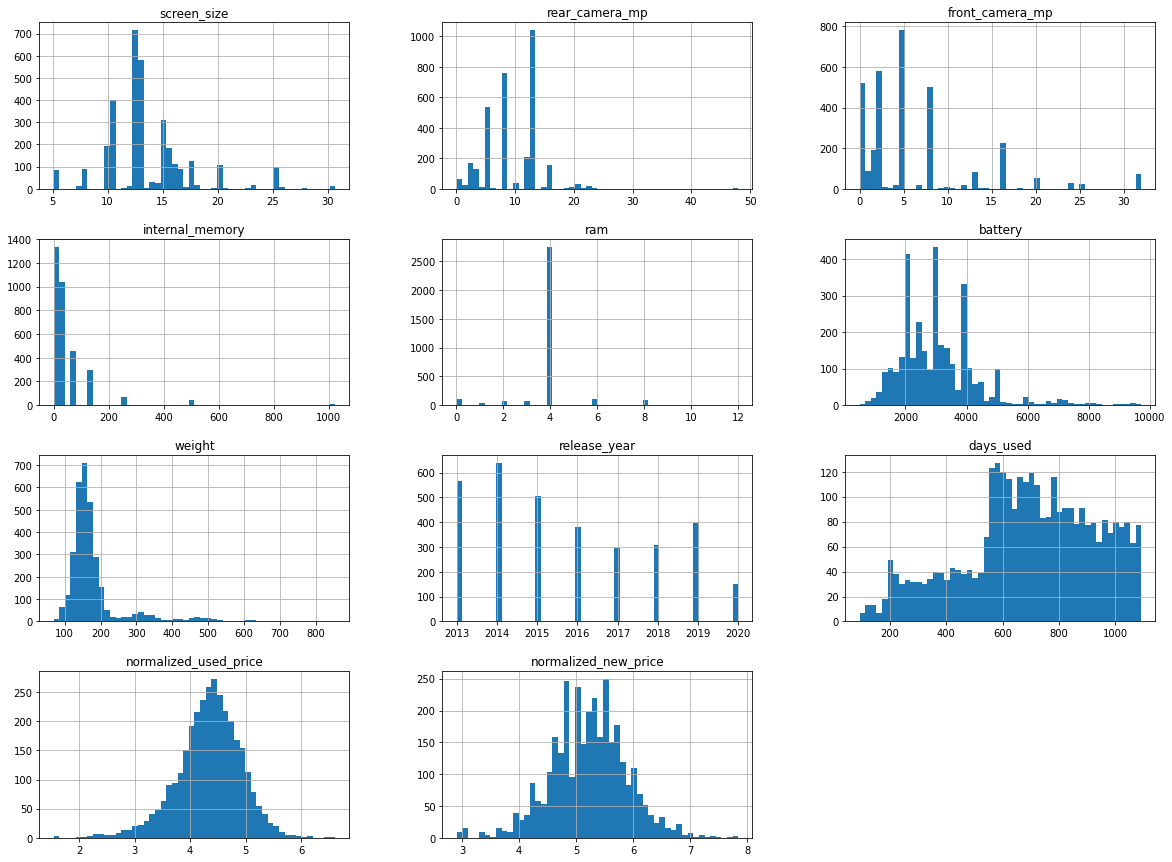

In [35]:
df.hist(bins=50, figsize=(20,15))
plt.show()



1.   Screen size - most have from 10 to 15 cls
2.   day_ued - most have form 550d to 1000+
3.   weight - most have form 100g to 200g
4.   ram = most have 4GB 
5.   battery most have from 2000mph to 4000mph







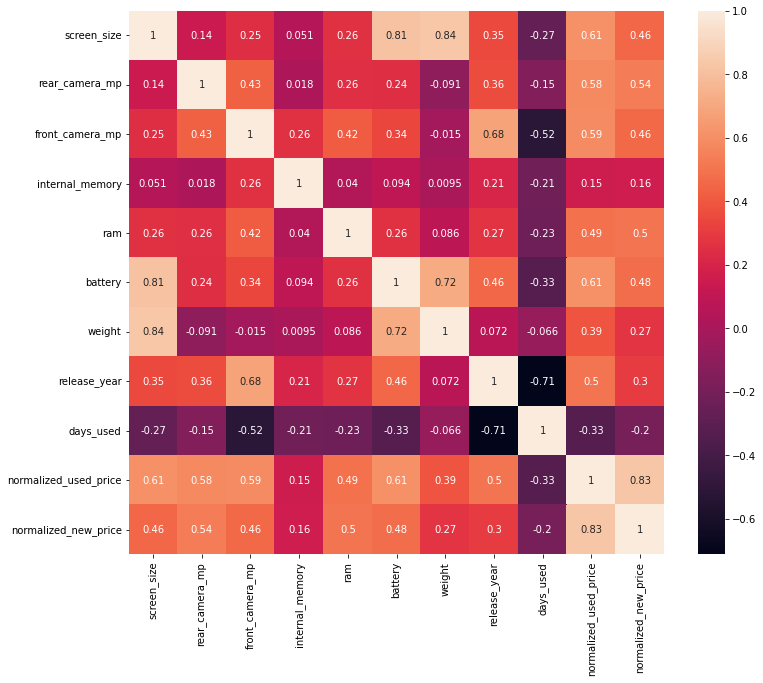

In [54]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Best correlation with used price is with battery, relese year, front cameran rear camera and screen size


In [37]:
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3253.000000,3253.000000,3253.00000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,13.617476,9.476354,6.09379,52.098632,3.962960,3074.926990,182.493637,2015.766370,695.695358,4.342386,5.217554
std,3.851520,4.802200,6.59958,85.442242,1.225895,1296.957619,90.359810,2.187719,235.454084,0.579414,0.671758
min,5.080000,0.080000,0.00000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.00000,16.000000,4.000000,2100.000000,140.450000,2014.000000,564.000000,4.019262,4.789157
50%,12.830000,8.000000,5.00000,32.000000,4.000000,3000.000000,158.000000,2015.000000,705.000000,4.377642,5.242223
75%,15.320000,13.000000,8.00000,64.000000,4.000000,3950.000000,182.000000,2018.000000,879.000000,4.725616,5.638070
max,30.710000,48.000000,32.00000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [38]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print(num_feature)

['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']


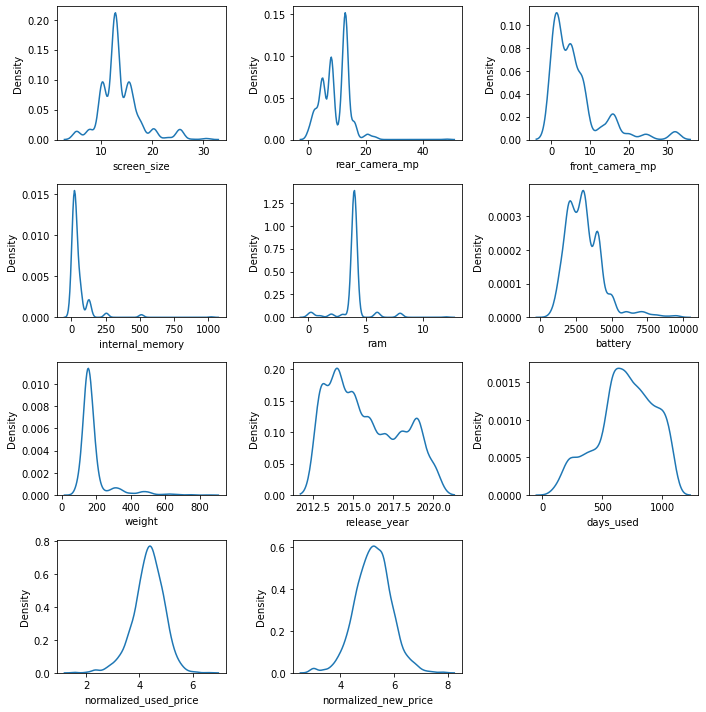

In [39]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

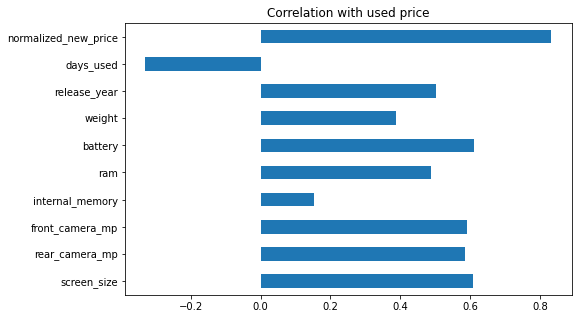

In [41]:
plt.figure(figsize=(8, 5))
X = df.drop('normalized_used_price', axis=1)
X.corr(method='spearman')
X.corrwith(df['normalized_used_price']).plot(kind='barh', title="Correlation with used price")
plt.show()

In [42]:
df_dummies = pd.get_dummies(df)

In [43]:
df_dummies.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Xiaomi,device_brand_ZTE,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,0,0,1,0,0,0,0,1,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,0,0,1,0,0,0,0,1,0,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,0,0,1,0,0,0,0,1,0,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,0,0,1,0,0,0,0,1,0,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,0,0,1,0,0,0,0,1,1,0


In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data = df_dummies.drop('normalized_used_price', axis= 1)
target = df_dummies['normalized_used_price']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.25, random_state = 42)

In [45]:
mc = MinMaxScaler()
X_train = mc.fit_transform(X_train)
X_test = mc.fit_transform(X_test)

In [46]:
print(f'X_trian shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_trian shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_trian shape: (2439, 51)
X_test shape: (814, 51)
y_trian shape: (2439,)
y_test shape: (814,)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Conclusion
R2 = 86%

mea = 0.051

In [49]:
y_pred = regressor.predict(X_test)
y_true = y_test.copy()

print(mean_squared_error(y_test, y_pred))
print(f'R2 score: {regressor.score(X_test, y_test):.4f}')

0.05151927305934906
R2 score: 0.8645


In [50]:
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] -  predictions['y_pred']
predictions.head()

,y_true,y_pred,error
2457,4.583640,4.487337,0.096303
173,4.911110,5.110706,-0.199597
3143,4.844659,4.763654,0.081006
1700,4.928123,4.607201,0.320921
1078,3.535145,3.752354,-0.217208


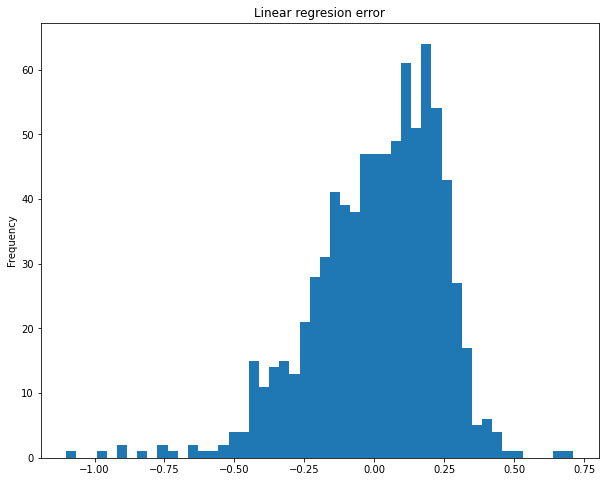

In [51]:
plt.figure(figsize=(10,8))
pr = predictions['error'].plot(kind='hist', bins=50, title="Linear regresion error")